In [1]:
from tensorflow.keras import datasets, layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
hist = model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0570 - accuracy: 0.9829
Epoch 2/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0485 - accuracy: 0.9852
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0412 - accuracy: 0.9872
Epoch 4/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0367 - accuracy: 0.9887
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0312 - accuracy: 0.9903


In [34]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 0s - loss: 0.0850 - accuracy: 0.9766


In [35]:
result = model.predict(test_images)

In [36]:
result

array([[1.8515600e-09, 1.7518359e-12, 4.4483977e-07, ..., 9.9994040e-01,
        2.2634540e-08, 8.5739011e-06],
       [1.1811468e-09, 9.2286631e-05, 9.9987793e-01, ..., 3.5291353e-19,
        1.7761607e-06, 1.9182119e-12],
       [1.7812439e-06, 9.9747473e-01, 1.4356185e-04, ..., 1.5456610e-03,
        7.5507507e-04, 6.0929378e-06],
       ...,
       [3.0988254e-15, 9.3604349e-15, 8.6887479e-15, ..., 4.5217583e-08,
        6.8287975e-10, 3.7681016e-07],
       [6.6964072e-13, 1.8072216e-10, 9.4096050e-14, ..., 1.1638566e-09,
        3.0660101e-06, 4.4301493e-10],
       [5.8924692e-09, 7.5518064e-13, 1.0201723e-08, ..., 1.9007538e-14,
        4.0246370e-12, 8.8139592e-14]], dtype=float32)

In [37]:
result2 = model.predict_classes(test_images)

In [38]:
result2

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
import matplotlib.pyplot as plt

def draw_plot(hist):
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

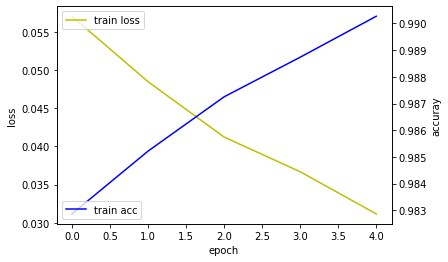

In [44]:
draw_plot(hist)